In [1]:
from algorithms import *
from algorithms.MlpV2 import *
data = Data()
data.print_shapes()
X_train = data.train_data
y_train = data.train_label

(45000, 128)
(45000, 10)
(5000, 128)
(5000, 10)
(10000, 128)
(10000, 10)


In [2]:
X_test = data.test_data
y_test = data.test_label
X_dev = data.validation_data
y_dev = data.validation_label

In [3]:
MOMENTUM = 0.9

In [4]:
nn = MlpV2(learning_rate=0.003, batch_size= 100)
nn.set_optimiser('Adam',[0.9,0.9])
nn.set_batchNormalizer(momentum = MOMENTUM)
nn.add_layer(128,512,"relu",1)
nn.add_layer(512,256,"relu",1)
nn.add_layer(256,128,"relu",1)
nn.add_layer(128,64,"relu",1)
nn.add_layer(64,10,"softmax",1)
### Try different learning rate and epochs

#print('loss:%f'%MSE[-1])

In [5]:
keep_rate_option = [1,0.8,0.5,0.2]
optimiser_option = [("Momentum",[0,0]),("Momentum",[0.9,0.9]),("Adam",[0.9,0.99])]
weight_decay_option = ["L1","L2"]
weight_decay_strength = [1,0.1,0.01,0.001,0]
loss = []
train_acc = []
dev_acc = []
train_precision = []
dev_precision = []
train_recall = []
dev_recall = []
train_f1 = []
dev_f1 = []
lr = 0.01
batch_size = 128 


In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [7]:
# store info in a dataframe

for keep_rate in keep_rate_option:    
    nn = MlpV2(learning_rate=lr, batch_size=batch_size)
    nn.set_optimiser(opt_type='Momentum', params = [MOMENTUM])
    nn.set_batchNormalizer()
    nn.add_layer(128,512,"relu",keep_rate)
    nn.add_layer(512,256,"relu",keep_rate)
    nn.add_layer(256,128,"relu",keep_rate)
    nn.add_layer(128,64,"relu",keep_rate)
    nn.add_layer(64,10,"softmax",1)
    
    train_loss = nn.fit(X_train, y_train, epochs=50)
    loss.append(train_loss)

    acc = nn.evaluate(X_train, y_train)
    train_acc.append(acc)
    
    t_acc = nn.evaluate(X_dev, y_dev)
    dev_acc.append(t_acc)
        
    y_pred_train = np.argmax(nn.predict(X_train), axis=1)
    y_train_transformed = np.argmax(y_train, axis=1)
    y_pred_dev = np.argmax(nn.predict(X_dev), axis=1)
    y_dev_transformed = np.argmax(y_dev, axis=1)
        
    precision = precision_score(y_train_transformed, y_pred_train, average='macro')
    recall = recall_score(y_train_transformed, y_pred_train, average='macro')
    f1 = f1_score(y_train_transformed, y_pred_train, average='macro')
        
    train_precision.append(precision)
    train_recall.append(recall)
    train_f1.append(f1)
        
    t_precision = precision_score(y_dev_transformed, y_pred_dev, average='macro')
    t_recall = recall_score(y_dev_transformed, y_pred_dev, average='macro')
    t_f1 = f1_score(y_dev_transformed, y_pred_dev, average='macro')
        
    dev_precision.append(t_precision)
    dev_recall.append(t_recall)
    dev_f1.append(t_f1)

Epoch: 1  Training Loss: 2.045051539904805  Time (sec): 12.992256164550781
Epoch: 2  Training Loss: 1.7394559554876659  Time (sec): 14.410463809967041
Epoch: 3  Training Loss: 1.6480465831007274  Time (sec): 11.991927862167358
Epoch: 4  Training Loss: 1.5903441114422283  Time (sec): 11.058428287506104
Epoch: 5  Training Loss: 1.5449790537054877  Time (sec): 11.975008487701416
Epoch: 6  Training Loss: 1.5041168297440481  Time (sec): 10.84599757194519
Epoch: 7  Training Loss: 1.4701266954253527  Time (sec): 11.934088945388794
Epoch: 8  Training Loss: 1.4404069734961735  Time (sec): 11.839338064193726
Epoch: 9  Training Loss: 1.412103776371077  Time (sec): 11.162148475646973
Epoch: 10  Training Loss: 1.3868100717767737  Time (sec): 11.803437948226929
Epoch: 11  Training Loss: 1.3604602565046207  Time (sec): 10.340343713760376
Epoch: 12  Training Loss: 1.3440796714943462  Time (sec): 11.692731618881226
Epoch: 13  Training Loss: 1.328367160626355  Time (sec): 11.602972984313965
Epoch: 14  T

KeyboardInterrupt: 

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

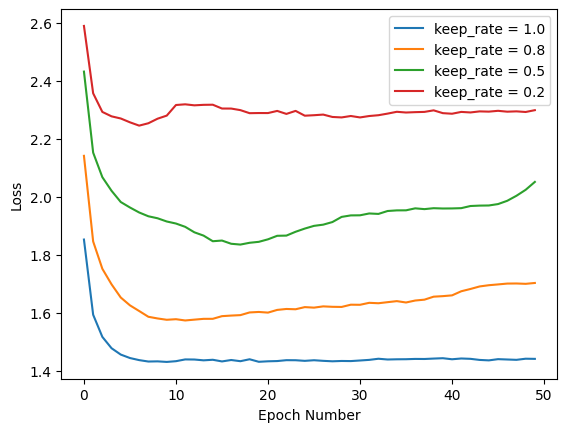

In [ ]:
# plot


for i in range(len(keep_rate_option)):
    
    plt.plot(d_holder[0][i],label=f'keep_rate = {keep_rate_option[i]:.1f}')
    
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
#plt.savefig('visual_outputs/dropout_loss.png')
plt.show()

NameError: name 'd_holder' is not defined

In [ ]:
d_holder = [loss,train_acc,dev_acc,train_precision,dev_precision,train_recall,dev_recall,train_f1,dev_f1]

In [ ]:
d_holder[2]

[0.5026, 0.4326, 0.227, 0.2096]

In [ ]:
loss = []
train_acc = []
dev_acc = []
train_precision = []
dev_precision = []
train_recall = []
dev_recall = []
train_f1 = []
dev_f1 = []

In [ ]:
for opt in optimiser_option:    
    nn = MlpV2(learning_rate=lr, batch_size=batch_size)
    nn.set_optimiser(opt_type=opt[0], params = opt[1])
    nn.set_batchNormalizer()
    nn.add_layer(128,512,"relu",1)
    nn.add_layer(512,256,"relu",1)
    nn.add_layer(256,128,"relu",1)
    nn.add_layer(128,64,"relu",1)
    nn.add_layer(64,10,"softmax",1)
    
    train_loss = nn.fit(X_train, y_train, epochs=50)
    loss.append(train_loss)

    acc = nn.evaluate(X_train, y_train)
    train_acc.append(acc)
    
    t_acc = nn.evaluate(X_dev, y_dev)
    dev_acc.append(t_acc)
        
    y_pred_train = np.argmax(nn.predict(X_train), axis=1)
    y_train_transformed = np.argmax(y_train, axis=1)
    y_pred_dev = np.argmax(nn.predict(X_dev), axis=1)
    y_dev_transformed = np.argmax(y_dev, axis=1)
        
    precision = precision_score(y_train_transformed, y_pred_train, average='macro')
    recall = recall_score(y_train_transformed, y_pred_train, average='macro')
    f1 = f1_score(y_train_transformed, y_pred_train, average='macro')
        
    train_precision.append(precision)
    train_recall.append(recall)
    train_f1.append(f1)
        
    t_precision = precision_score(y_dev_transformed, y_pred_dev, average='macro')
    t_recall = recall_score(y_dev_transformed, y_pred_dev, average='macro')
    t_f1 = f1_score(y_dev_transformed, y_pred_dev, average='macro')
        
    dev_precision.append(t_precision)
    dev_recall.append(t_recall)
    dev_f1.append(t_f1)

Epoch: 1  Training Loss: 1.8511509588903146  Time (sec): 9.765853881835938
Epoch: 2  Training Loss: 1.5916615539332053  Time (sec): 10.28646969795227
Epoch: 3  Training Loss: 1.5052774217338265  Time (sec): 8.468335628509521
Epoch: 4  Training Loss: 1.459276977288124  Time (sec): 18.285067319869995
Epoch: 5  Training Loss: 1.4391298302901727  Time (sec): 14.351587295532227
Epoch: 6  Training Loss: 1.433789647832448  Time (sec): 12.757861614227295
Epoch: 7  Training Loss: 1.4299610549276445  Time (sec): 10.142883777618408
Epoch: 8  Training Loss: 1.4294588596985736  Time (sec): 11.33563494682312
Epoch: 9  Training Loss: 1.426409340892897  Time (sec): 9.181429147720337
Epoch: 10  Training Loss: 1.4387364902699948  Time (sec): 9.756886720657349
Epoch: 11  Training Loss: 1.4399086533918763  Time (sec): 9.808781623840332
Epoch: 12  Training Loss: 1.43964712230234  Time (sec): 8.987910747528076
Epoch: 13  Training Loss: 1.4376473242053915  Time (sec): 10.122906684875488
Epoch: 14  Training L

In [ ]:
o_holder = [loss,train_acc,dev_acc,train_precision,dev_precision,train_recall,dev_recall,train_f1,dev_f1]

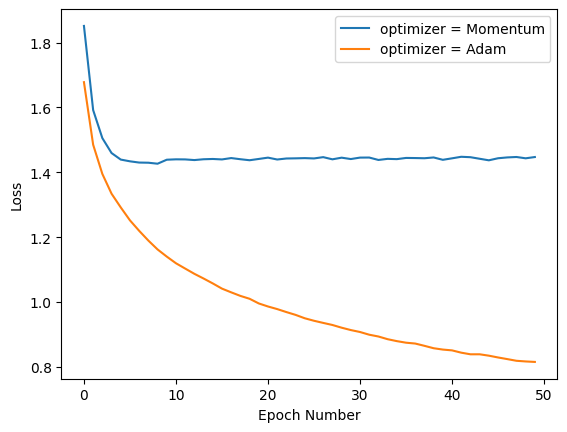

In [ ]:
for i in range(len(optimiser_option)):
    
    plt.plot(o_holder[0][i],label=f'optimizer = {optimiser_option[i]}')
    
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.savefig('visual_outputs/optimizer_loss.png')
plt.show()

In [ ]:
loss = []
train_acc = []
dev_acc = []
train_precision = []
dev_precision = []
train_recall = []
dev_recall = []
train_f1 = []
dev_f1 = []

In [ ]:
for strength in weight_decay_strength:
    
    nn = MlpV2(learning_rate=lr, batch_size=batch_size)
    nn.set_optimiser(opt_type='Adam', params = [MOMENTUM,MOMENTUM])
    nn.set_batchNormalizer()
    nn.set_regularizer(strength)
    nn.add_layer(128,512,"relu",1)
    nn.add_layer(512,256,"relu",1)
    nn.add_layer(256,128,"relu",1)
    nn.add_layer(128,64,"relu",1)
    nn.add_layer(64,10,"softmax",1)
    
    train_loss = nn.fit(X_train, y_train, epochs=50)
    loss.append(train_loss)

    acc = nn.evaluate(X_train, y_train)
    train_acc.append(acc)
    
    t_acc = nn.evaluate(X_dev, y_dev)
    dev_acc.append(t_acc)
        
    y_pred_train = np.argmax(nn.predict(X_train), axis=1)
    y_train_transformed = np.argmax(y_train, axis=1)
    y_pred_dev = np.argmax(nn.predict(X_dev), axis=1)
    y_dev_transformed = np.argmax(y_dev, axis=1)
        
    precision = precision_score(y_train_transformed, y_pred_train, average='macro')
    recall = recall_score(y_train_transformed, y_pred_train, average='macro')
    f1 = f1_score(y_train_transformed, y_pred_train, average='macro')
        
    train_precision.append(precision)
    train_recall.append(recall)
    train_f1.append(f1)
        
    t_precision = precision_score(y_dev_transformed, y_pred_dev, average='macro')
    t_recall = recall_score(y_dev_transformed, y_pred_dev, average='macro')
    t_f1 = f1_score(y_dev_transformed, y_pred_dev, average='macro')
        
    dev_precision.append(t_precision)
    dev_recall.append(t_recall)
    dev_f1.append(t_f1)

Epoch: 1  Training Loss: 1.7694629340950856  Time (sec): 14.245872735977173
Epoch: 2  Training Loss: 1.5975097206599527  Time (sec): 16.073980569839478
Epoch: 3  Training Loss: 1.5746216248513958  Time (sec): 23.071251153945923
Epoch: 4  Training Loss: 1.651166614058883  Time (sec): 20.469216108322144
Epoch: 5  Training Loss: 1.8051046620757452  Time (sec): 16.04306435585022
Epoch: 6  Training Loss: 2.04095619639741  Time (sec): 16.30835270881653
Epoch: 7  Training Loss: 2.378735692063961  Time (sec): 18.715909242630005
Epoch: 8  Training Loss: 2.811144535698407  Time (sec): 15.332962274551392
Epoch: 9  Training Loss: 3.342133551022122  Time (sec): 18.506473302841187
Epoch: 10  Training Loss: 3.961425787877331  Time (sec): 18.655069589614868
Epoch: 11  Training Loss: 4.707706761702428  Time (sec): 18.083601236343384
Epoch: 12  Training Loss: 5.54406832274742  Time (sec): 17.125189542770386
Epoch: 13  Training Loss: 6.480742594876848  Time (sec): 16.867852210998535
Epoch: 14  Training L

In [ ]:
w_holder = [loss,train_acc,dev_acc,train_precision,dev_precision,train_recall,dev_recall,train_f1,dev_f1]

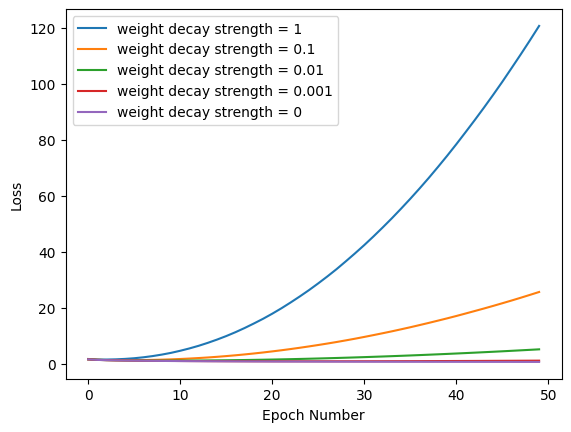

In [ ]:
for i in range(len(weight_decay_strength)):
    
    plt.plot(w_holder[0][i],label=f'weight decay strength = {weight_decay_strength[i]}')
    
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.savefig('visual_outputs/weight_decay_strength_loss.png')
plt.show()

In [ ]:
loss[3]

array([1.64079869, 1.45708135, 1.36746702, 1.29842743, 1.24749055,
       1.19918821, 1.1626184 , 1.13357262, 1.10300882, 1.07866641,
       1.05738237, 1.03739884, 1.02311681, 1.00716329, 0.99533233,
       0.98209824, 0.97595134, 0.96865069, 0.95980489, 0.9576235 ,
       0.95132062, 0.95116132, 0.95048652, 0.95150419, 0.95016281,
       0.9530633 , 0.95343921, 0.95758542, 0.96046772, 0.96333324,
       0.97044541, 0.97590433, 0.98267742, 0.9904112 , 0.99731778,
       1.00541405, 1.01583804, 1.0256069 , 1.03521939, 1.04430844,
       1.05793721, 1.06689627, 1.07951922, 1.09446593, 1.10941577,
       1.12134592, 1.13480725, 1.15104151, 1.16694706, 1.18141396])

In [ ]:
loss[4]

array([1.64290616, 1.44446165, 1.35431533, 1.28796811, 1.22999851,
       1.18744588, 1.14698601, 1.11275508, 1.08186835, 1.05579856,
       1.02908902, 1.0067027 , 0.98872311, 0.96637222, 0.9518318 ,
       0.93815966, 0.92151379, 0.90864832, 0.8971328 , 0.88521629,
       0.87300648, 0.86492771, 0.85633346, 0.84846611, 0.83721948,
       0.82996645, 0.82205679, 0.81717925, 0.81116313, 0.80318147,
       0.79710262, 0.79187404, 0.78714985, 0.78108893, 0.77629241,
       0.7752984 , 0.77171795, 0.76424831, 0.76215695, 0.75628868,
       0.75405251, 0.74811392, 0.74606969, 0.74187748, 0.74210251,
       0.7374382 , 0.73615993, 0.73099855, 0.72966065, 0.72658683])